- predicting turbine energy yield (TEY) using ambient variables as features.

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

In [4]:
df = pd.read_csv('gas_turbinesAnn.csv')

In [5]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [8]:
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

<AxesSubplot:>

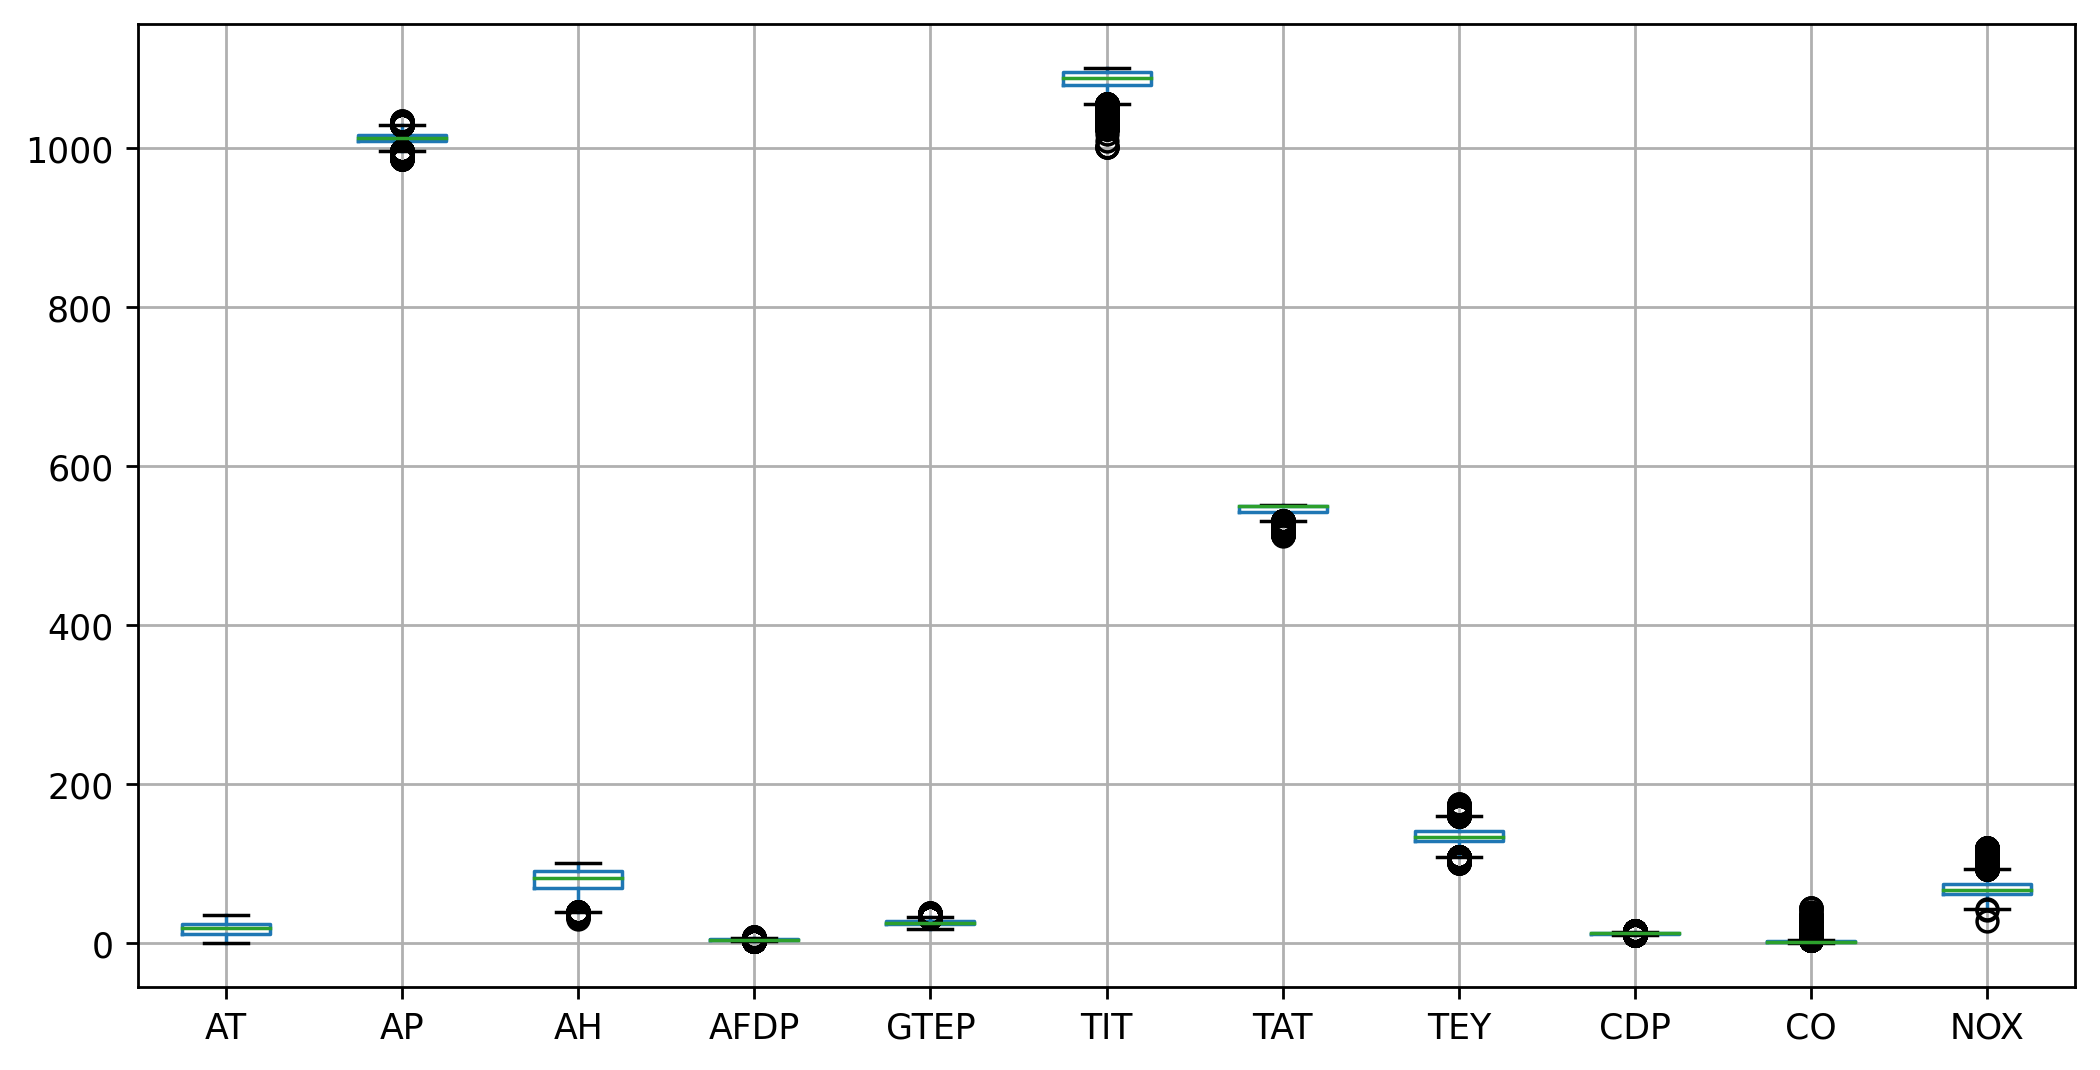

In [9]:
df.boxplot()

C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level fun

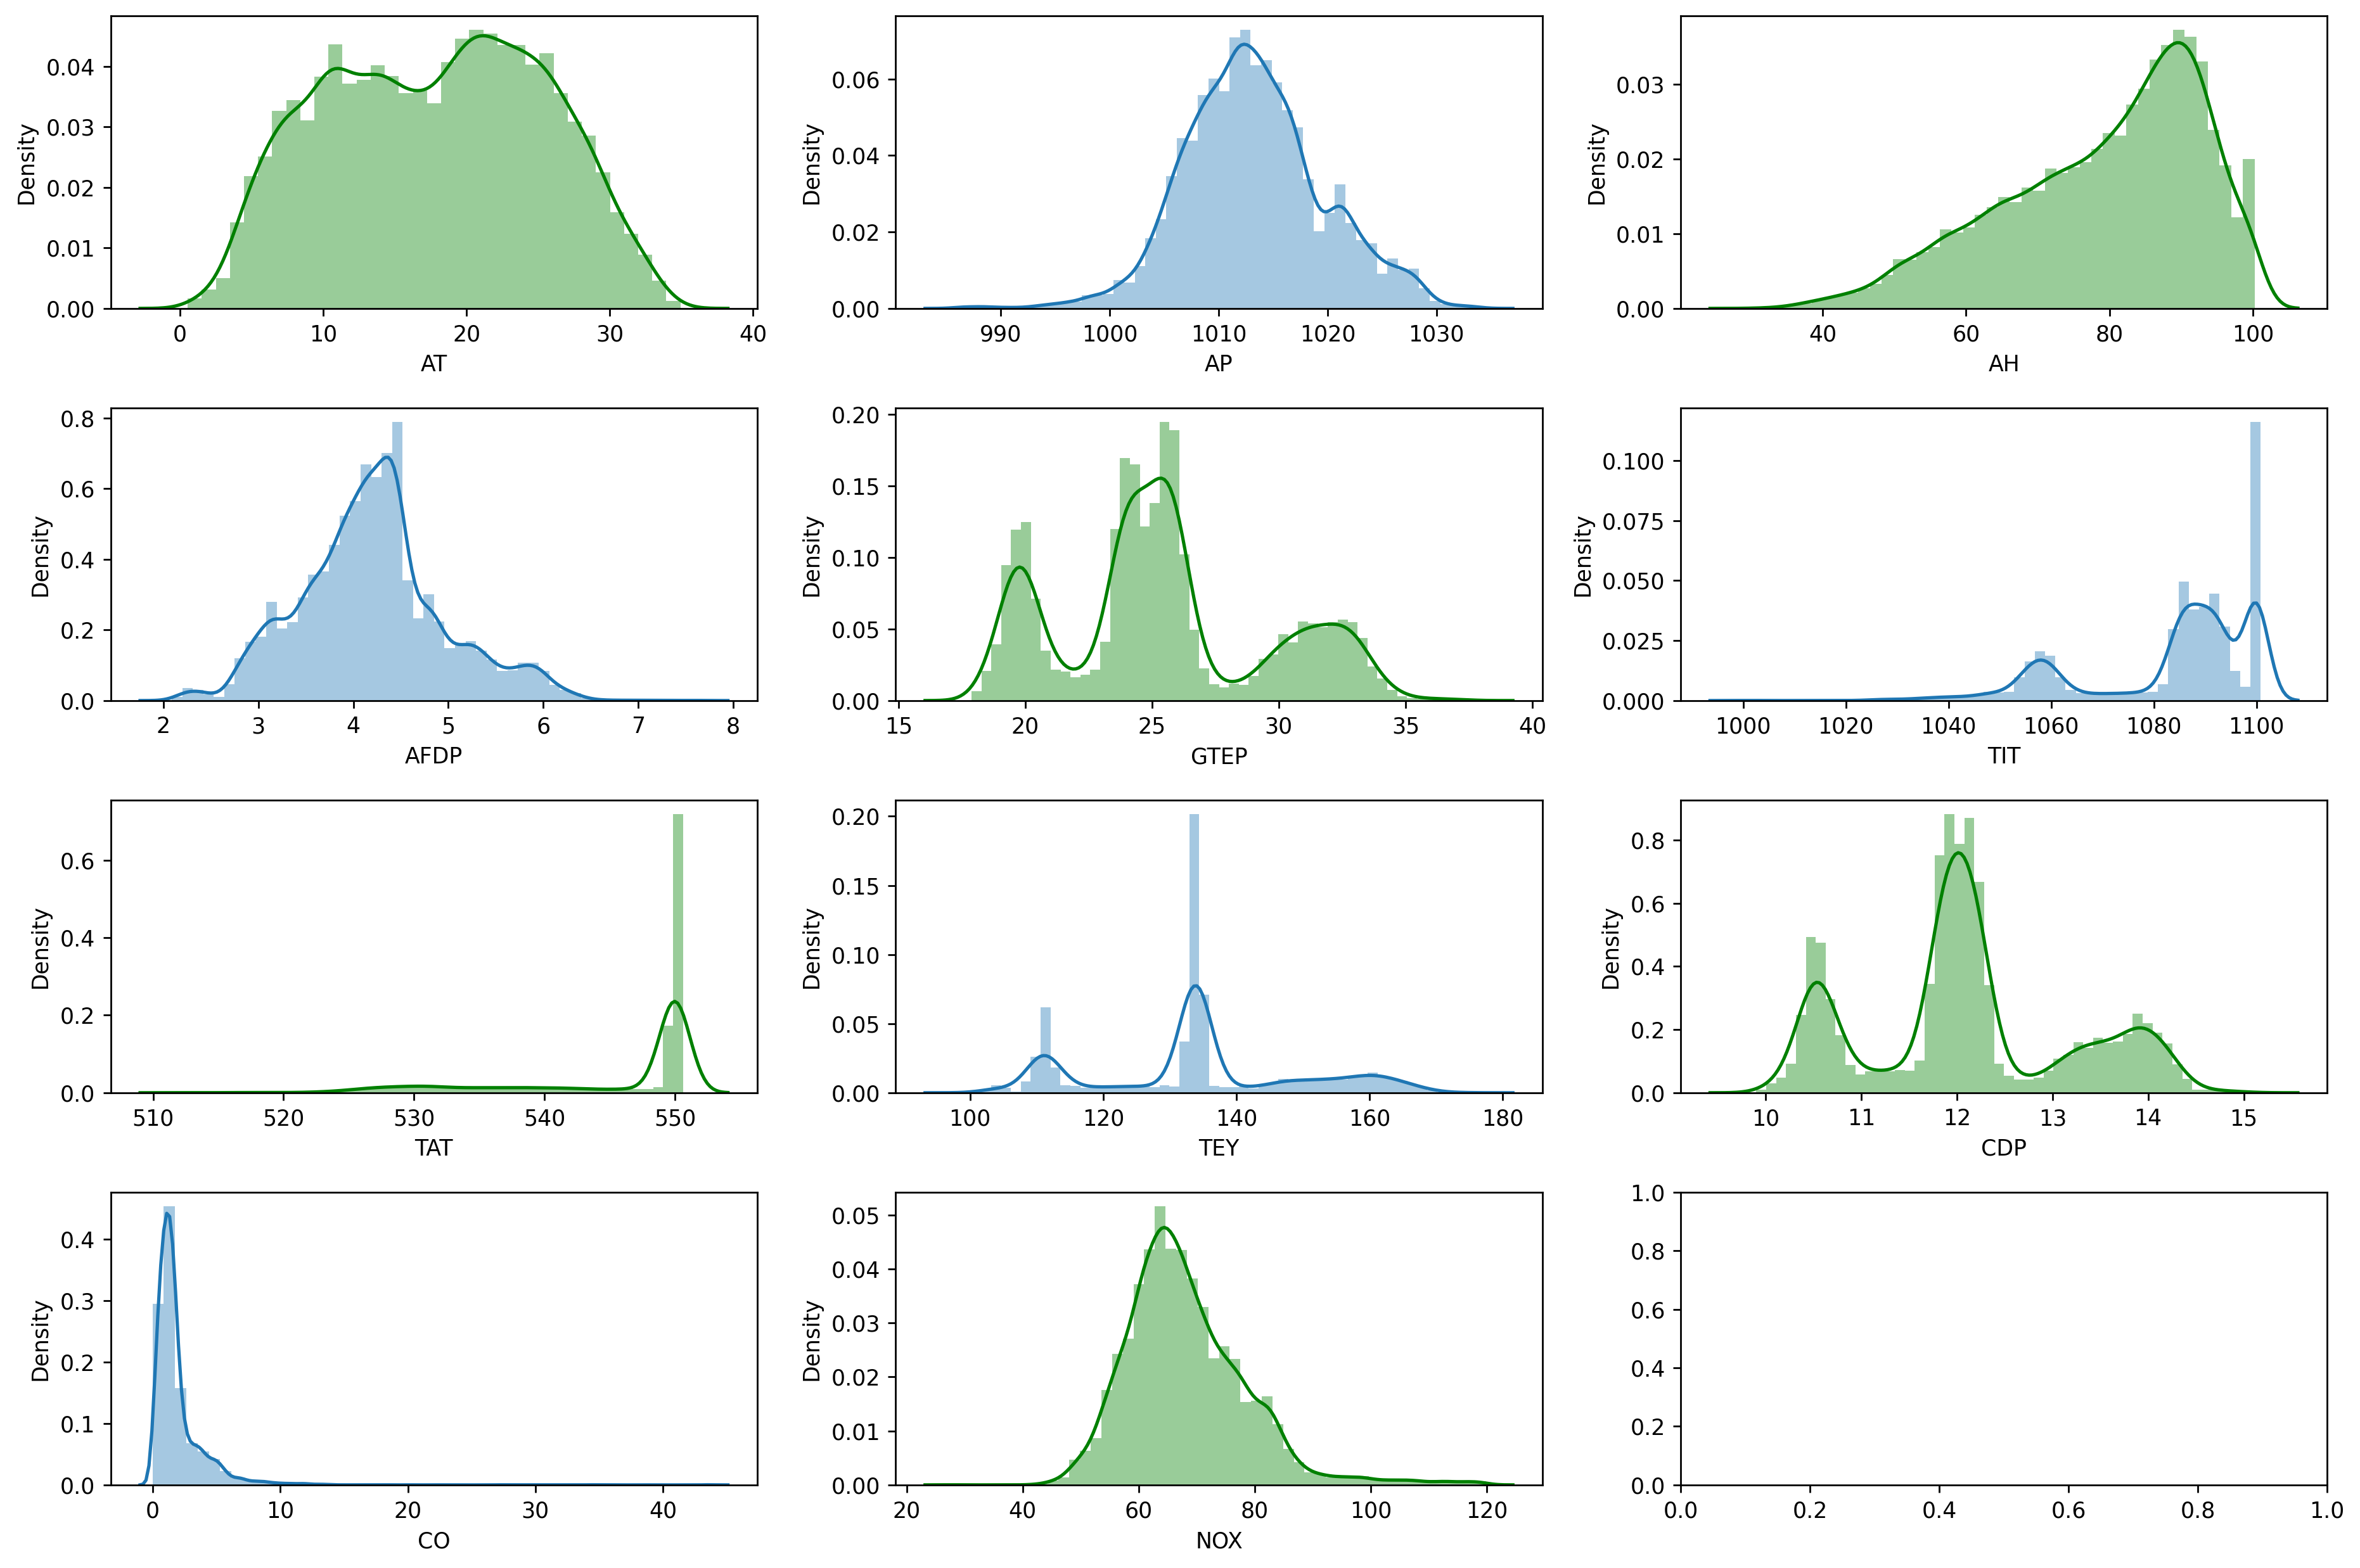

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(df.AT, ax=ax[0,0],color='g')
sns.distplot(df.AP, ax=ax[0,1])
sns.distplot(df.AH, ax=ax[0,2],color='g')
sns.distplot(df.AFDP, ax=ax[1,0])
sns.distplot(df.GTEP, ax=ax[1,1],color='g')
sns.distplot(df.TIT, ax=ax[1,2])
sns.distplot(df.TAT, ax=ax[2,0],color='g')
sns.distplot(df.TEY, ax=ax[2,1])
sns.distplot(df.CDP, ax=ax[2,2],color='g')
sns.distplot(df.CO, ax=ax[3,0])
sns.distplot(df.NOX, ax=ax[3,1],color='g')

plt.tight_layout()

- Splitting Data into Training and Testing

In [26]:
x = df.drop(columns='TEY',axis =1)
y = df['TEY']

In [27]:
# feature Scaling

In [28]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

# Model Building

In [31]:
#Initialize ann model
ann = Sequential()

#Add hidden layers
ann.add(Dense(units=30, activation='linear'))
ann.add(Dense(units=20, activation='relu'))

#Add output layer
ann.add(Dense(units=1))

#Establish the connection between layers
ann.compile(optimizer='adam',loss='mse')

#Fit the data 
ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=150)

Epoch 1/150
376/376 [==============================] - 2s 3ms/step - loss: 11019.4004 - val_loss: 3611.8354
Epoch 2/150
376/376 [==============================] - 1s 3ms/step - loss: 987.0825 - val_loss: 359.5786
Epoch 3/150
376/376 [==============================] - 1s 3ms/step - loss: 272.7529 - val_loss: 220.6839
Epoch 4/150
376/376 [==============================] - 1s 3ms/step - loss: 159.9402 - val_loss: 123.8794
Epoch 5/150
376/376 [==============================] - 1s 3ms/step - loss: 86.5162 - val_loss: 68.5445
Epoch 6/150
376/376 [==============================] - 1s 3ms/step - loss: 47.3445 - val_loss: 38.6431
Epoch 7/150
376/376 [==============================] - 1s 3ms/step - loss: 27.6706 - val_loss: 23.3914
Epoch 8/150
376/376 [==============================] - 1s 3ms/step - loss: 17.3967 - val_loss: 15.6350
Epoch 9/150
376/376 [==============================] - 1s 3ms/step - loss: 11.8657 - val_loss: 10.9219
Epoch 10/150
376/376 [==============================] - 1s 3ms

376/376 [==============================] - 1s 3ms/step - loss: 0.5103 - val_loss: 0.5828
Epoch 82/150
376/376 [==============================] - 1s 3ms/step - loss: 0.5130 - val_loss: 0.5246
Epoch 83/150
376/376 [==============================] - 1s 3ms/step - loss: 0.5061 - val_loss: 0.5678
Epoch 84/150
376/376 [==============================] - 1s 4ms/step - loss: 0.5006 - val_loss: 0.5465
Epoch 85/150
376/376 [==============================] - 1s 3ms/step - loss: 0.5143 - val_loss: 0.6395
Epoch 86/150
376/376 [==============================] - 1s 3ms/step - loss: 0.4750 - val_loss: 0.5095
Epoch 87/150
376/376 [==============================] - 1s 2ms/step - loss: 0.5181 - val_loss: 0.6543
Epoch 88/150
376/376 [==============================] - 1s 2ms/step - loss: 0.5037 - val_loss: 0.6184
Epoch 89/150
376/376 [==============================] - 1s 3ms/step - loss: 0.5202 - val_loss: 0.5478
Epoch 90/150
376/376 [==============================] - 1s 2ms/step - loss: 0.4952 - val_loss: 

<AxesSubplot:>

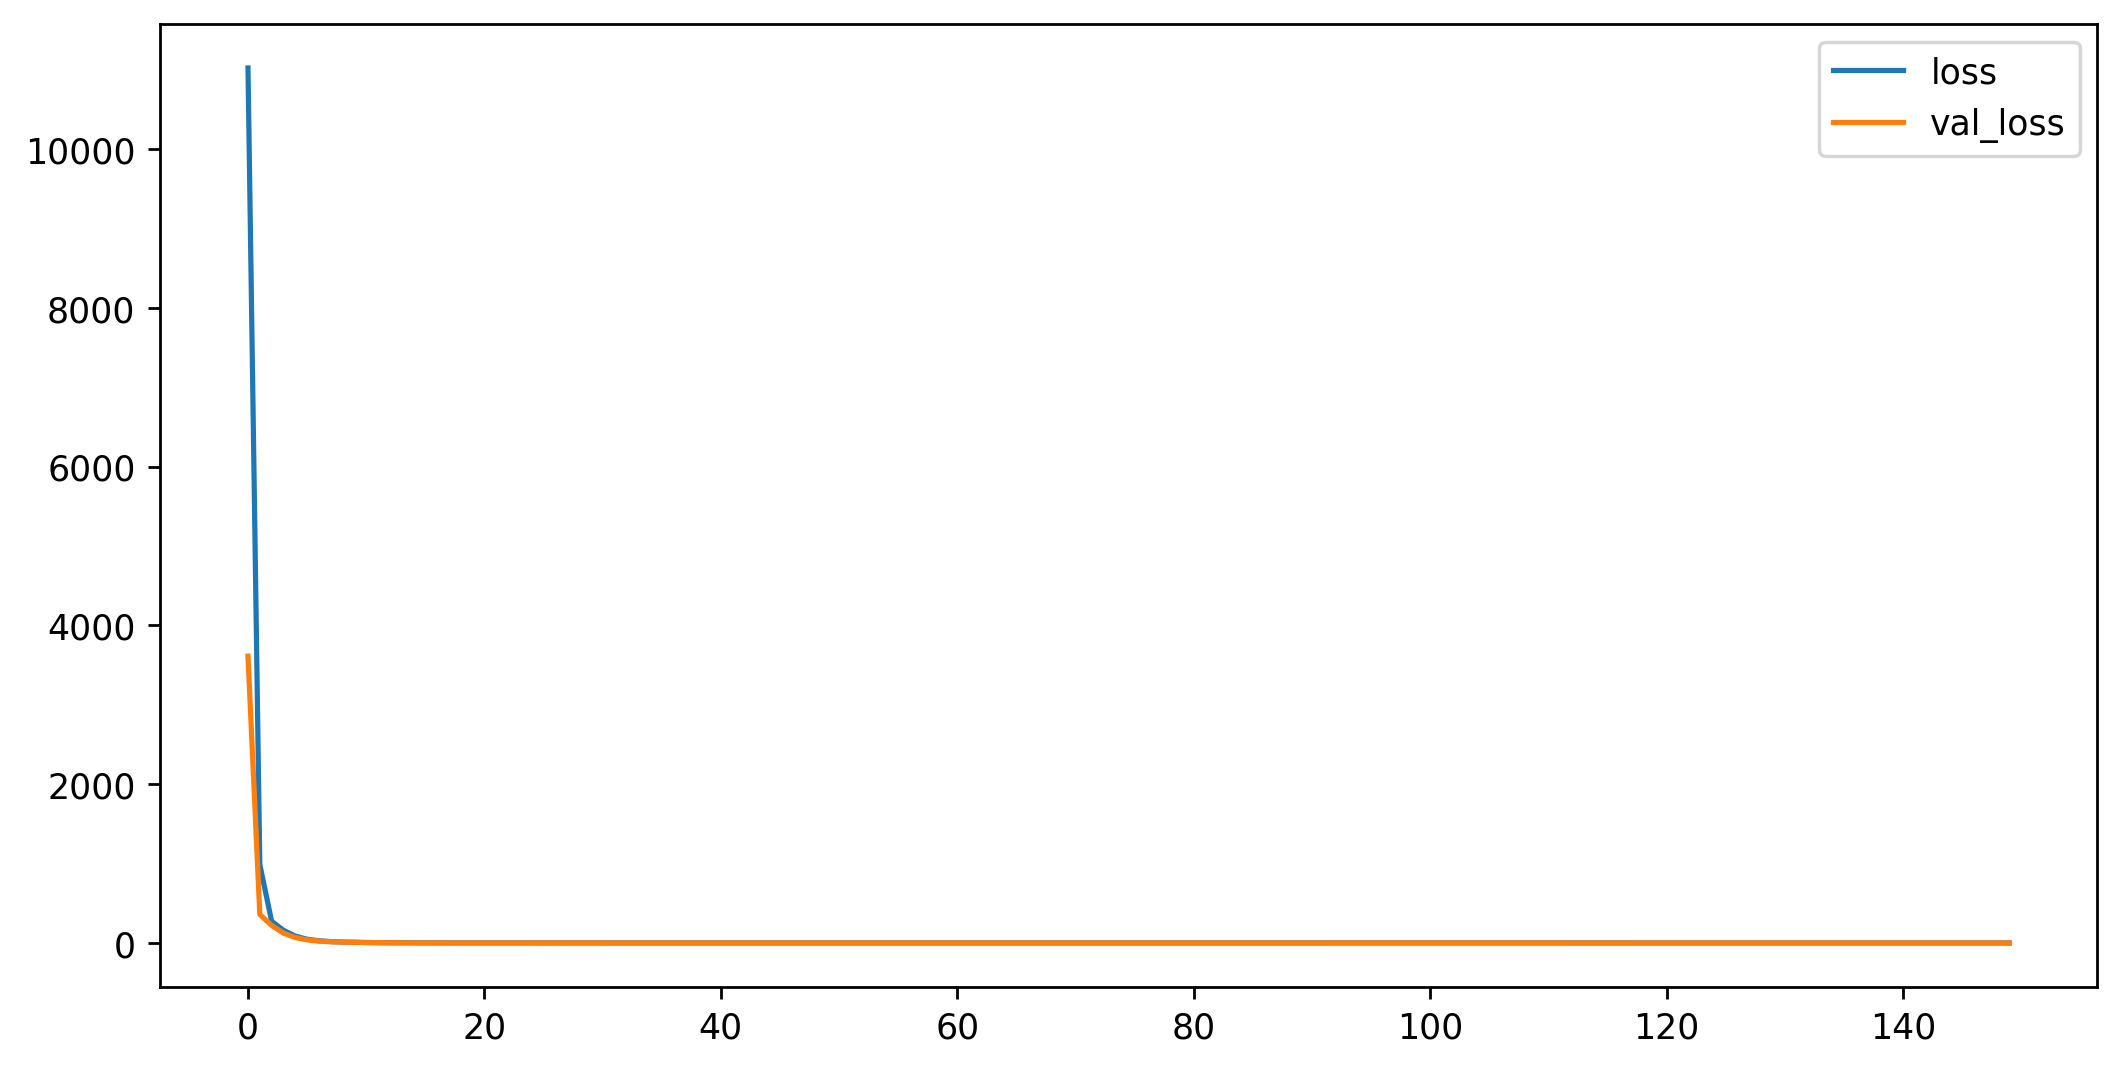

In [32]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [33]:
ypred = ann.predict(xtest)

94/94 [==============================] - 0s 2ms/step


In [38]:
ypred = ypred > 0.5

# Hyperparameter Tuning

# Early Stopping

In [50]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [52]:
ann = Sequential()

ann.add(Dense(units=30, activation='linear'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1))
ann.compile(optimizer='adam', loss = 'mse')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=500)

Epoch 1/500
376/376 [==============================] - 2s 3ms/step - loss: 12652.1914 - val_loss: 5024.8218
Epoch 2/500
376/376 [==============================] - 1s 3ms/step - loss: 1668.7389 - val_loss: 376.2057
Epoch 3/500
376/376 [==============================] - 1s 3ms/step - loss: 275.8452 - val_loss: 216.3745
Epoch 4/500
376/376 [==============================] - 1s 3ms/step - loss: 162.1570 - val_loss: 133.0281
Epoch 5/500
376/376 [==============================] - 1s 3ms/step - loss: 98.4736 - val_loss: 83.5086
Epoch 6/500
376/376 [==============================] - 1s 3ms/step - loss: 58.4725 - val_loss: 50.4282
Epoch 7/500
376/376 [==============================] - 1s 3ms/step - loss: 34.6513 - val_loss: 31.1399
Epoch 8/500
376/376 [==============================] - 1s 3ms/step - loss: 20.4728 - val_loss: 17.2945
Epoch 9/500
376/376 [==============================] - 1s 3ms/step - loss: 11.6360 - val_loss: 10.3135
Epoch 10/500
376/376 [==============================] - 1s 3m

376/376 [==============================] - 1s 2ms/step - loss: 0.4222 - val_loss: 0.5331
Epoch 82/500
376/376 [==============================] - 1s 2ms/step - loss: 0.4212 - val_loss: 0.8079
Epoch 83/500
376/376 [==============================] - 1s 3ms/step - loss: 0.4305 - val_loss: 0.3787
Epoch 84/500
376/376 [==============================] - 1s 3ms/step - loss: 0.4264 - val_loss: 0.4580
Epoch 85/500
376/376 [==============================] - 1s 3ms/step - loss: 0.4350 - val_loss: 0.5862
Epoch 86/500
376/376 [==============================] - 1s 2ms/step - loss: 0.4057 - val_loss: 0.3823
Epoch 87/500
376/376 [==============================] - 1s 2ms/step - loss: 0.3948 - val_loss: 0.3731
Epoch 88/500
376/376 [==============================] - 1s 2ms/step - loss: 0.4010 - val_loss: 0.3807
Epoch 89/500
376/376 [==============================] - 1s 3ms/step - loss: 0.4160 - val_loss: 0.4485
Epoch 90/500
376/376 [==============================] - 1s 2ms/step - loss: 0.4702 - val_loss: 

<AxesSubplot:>

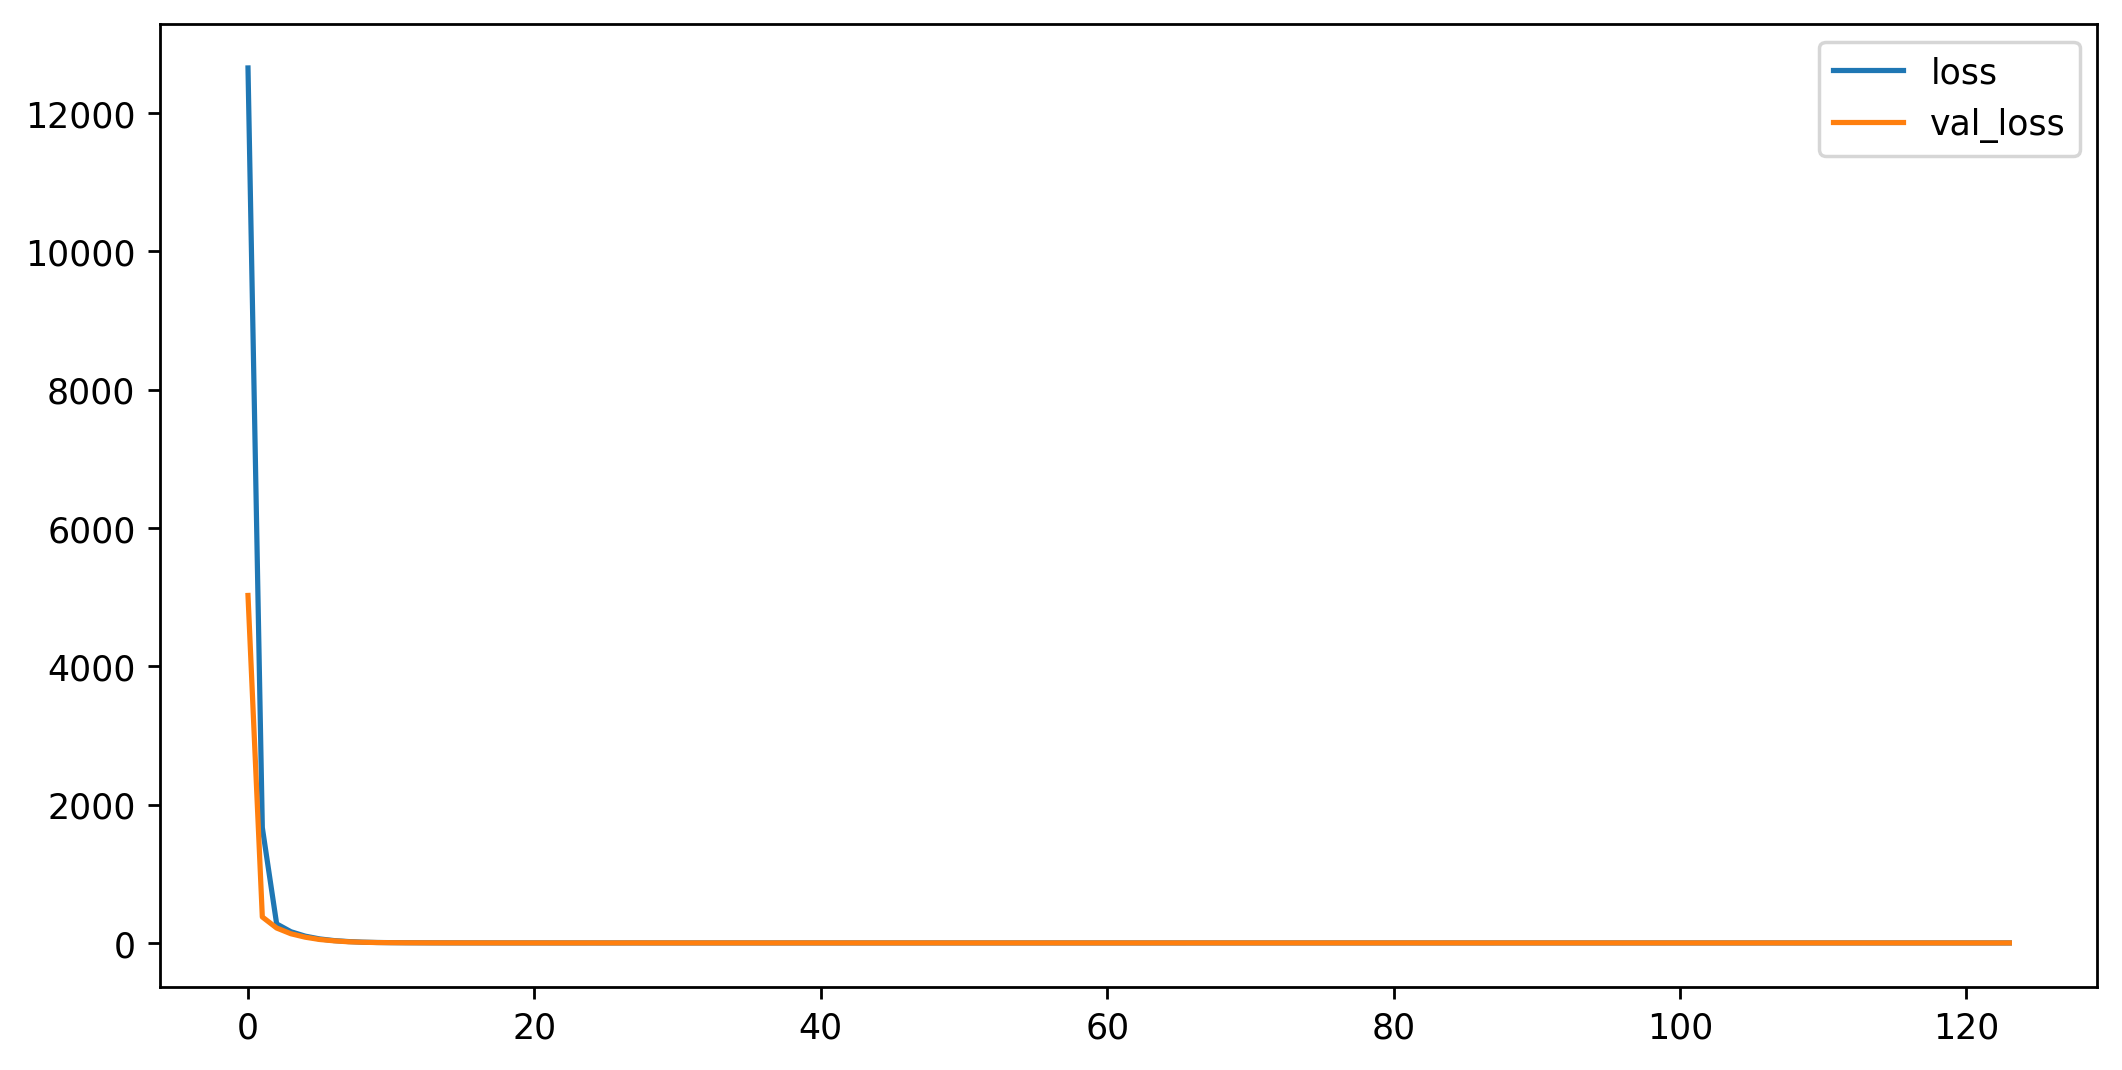

In [53]:
loss = pd.DataFrame(ann.history.history)
loss.plot()